<a href="https://colab.research.google.com/github/GOPIKAV77/Python/blob/main/prediction_of_regression_truck_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel("TRUCKING.xlsx")

In [7]:
df

,Driving Assignmnet,x1,n_of_deliveries,travel_time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


<Axes: xlabel='n_of_deliveries'>

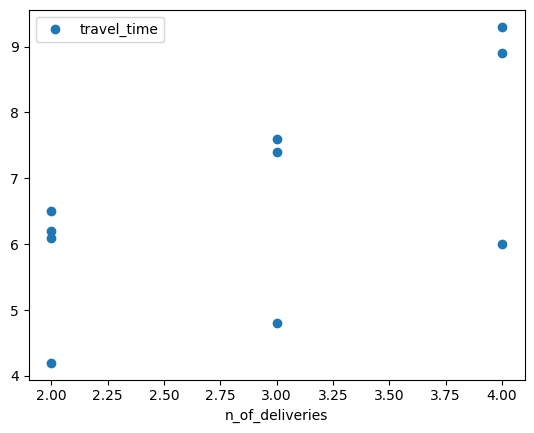

In [9]:
df.plot('n_of_deliveries','travel_time',style='o')

In [11]:
import statsmodels.api as s
s1 = df["n_of_deliveries"]
s2 = df["travel_time"]
s1 = s.add_constant(s1)
model = s.OLS(s2,s1)
output = model.fit()
output.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     4.871
Date:                Sun, 16 Feb 2025   Prob (F-statistic):             0.0583
Time:                        15:25:30   Log-Likelihood:                -16.168
No. Observations:                  10   AIC:                             36.34
Df Residuals:                       8   BIC:                             36.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.3797      1.565      2.160      0.063      -0.229       6.988
n_of_deliveries     1.1449      0.519      2.207      0.058      -0.051       2.341
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   2.924
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                1.562
Skew:                          -0.781   Prob(JB):                        0.458
Kurtosis:                       1.857   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The equation is y = a+bx so, y = 1.1449x+3.3797



In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
x = df["n_of_deliveries"].values.reshape(-1,1)
y = df["travel_time"].values.reshape(-1,1)


In [14]:
reg= LinearRegression()
reg.fit(x,y)

LinearRegression()

In [16]:
reg.intercept_[0],reg.coef_[0][0]

(3.379710144927536, 1.1449275362318843)

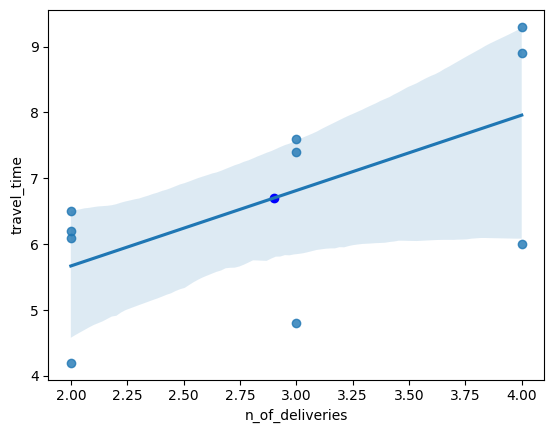

In [17]:
x = df["n_of_deliveries"]
y = df["travel_time"]
plt.figure()
sns.regplot(x=x,y=y,data=df,fit_reg = True)
plt.scatter(np.mean(x),np.mean(y),color="blue")

In [22]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(output,alpha=0.05)
fitted_values = data[:,2]
predicted_mean_df = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

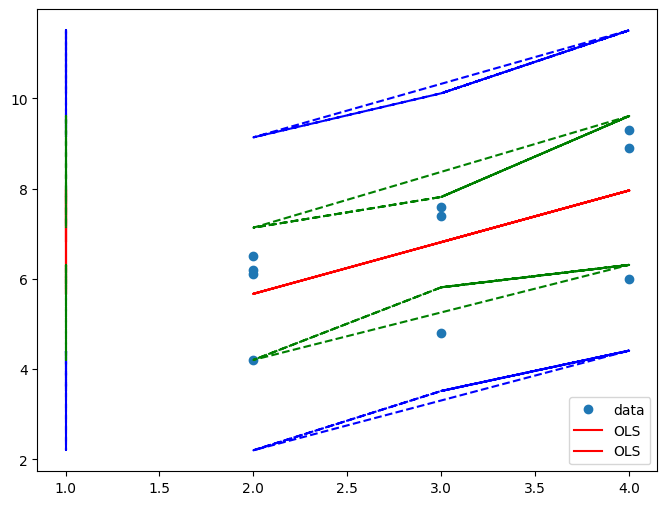

In [23]:
X = s.add_constant(x)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label='data')
ax.plot(X,fitted_values,'r-',label='OLS')
ax.plot(X,predict_ci_low,'b--')
ax.plot(X, predict_ci_upp,'b--')
ax.plot(X,predict_mean_ci_low,'g--')
ax.plot(X,predict_mean_ci_upp,'g--')
ax.legend(loc='best')
plt.show()